# **1. Import libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# **2. Load dataset**


In [96]:
# Load dataset
df = pd.read_csv('/content/train_product_data.csv')

Display the top 15 rows of the dataframe

In [97]:
# Display first few rows
df.head(15)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."
5,4044c0ac52c1ee4b28777417651faf42,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVUHAAVH9X,1199.0,479.0,"[""http://img5a.flixcart.com/image/short/5/z/c/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
6,e54bc0a7c3429da2ebef0b30331fe3d2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/ladela-bellies/p/itmeh...,Ladela Bellies,Footwear,SHOEH4KM2W3Z6EH5,1724.0,950.0,"[""http://img5a.flixcart.com/image/shoe/s/g/m/b...",False,Key Features of Ladela Bellies Brand: LADELA C...,5,5,Ladela,"{""product_specification""=>[{""key""=>""Occasion"",..."
7,c73e78fb440ff8972e0762daed4fc109,2016-03-25 22:59:23 +0000,http://www.flipkart.com/carrel-printed-women-s...,Carrel Printed Women's,Clothing,SWIEHF3EF5PZAZUY,2299.0,910.0,"[""http://img6a.flixcart.com/image/swimsuit/5/v...",False,Key Features of Carrel Printed Women's Fabric:...,No rating available,No rating available,Carrel,"{""product_specification""=>[{""key""=>""Neck"", ""va..."
8,9aacdecceb404c74abddc513fd2756a8,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FGBDJGX8FW,999.0,379.0,"[""http://img6a.flixcart.com/image/short/q/z/v/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
9,83c53f8948f508f51d2249b489ca8e7d,2016-03-25 22:59:23 +0000,http://www.flipkart.com/freelance-vacuum-bottl...,Freelance Vacuum Bottles 350 ml Bottle,Pens & Stationery,BOTEGYTZ2T6WUJMM,699.0,699.0,"[""http://img5a.flixcart.com/image/bottle/j/m/m...",False,Specifications of Fr

The command pd.options.display.max_columns = None in Pandas sets the maximum number of columns to display in the output to unlimited. This is useful when you're working with DataFrames that have many columns, ensuring you can see all of them without truncation.

In [98]:
# Display All Columns
pd.options.display.max_columns = None
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,Footwear,SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
2,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
3,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,Clothing,SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,SHOEH3DZBFR88SCK,699.0,349.0,"[""http://img6a.flixcart.com/image/shoe/b/p/n/p...",False,"Key Features of dilli bazaaar Bellies, Corpora...",No rating available,No rating available,dilli bazaaar,"{""product_specification""=>[{""key""=>""Occasion"",..."


# **3. Exploratory Data Analysis (EDA)**

Let us count the number of occurances of each Category value in the specified target column.

In [99]:
df['product_category_tree'].value_counts()

,count
product_category_tree,
Clothing,5316
Jewellery,3218
Footwear,1083
Automotive,937
Mobiles & Accessories,768
Home Decor & Festive Needs,714
Kitchen & Dining,610
Computers,531
Watches,526


### Print the shape of the dataframe

In [100]:
# Display dataset shape
df.shape

(14999, 15)

In [101]:
print("Number of columns: {}".format(df.shape[1]))
print("Number of rows: {}".format(df.shape[0]))

Number of columns: 15
Number of rows: 14999


###Information about data

To get information about the DataFrame, including data types and non-null values count, we can use the info() method

In [102]:
# Display dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  14999 non-null  object 
 1   crawl_timestamp          14999 non-null  object 
 2   product_url              14999 non-null  object 
 3   product_name             14999 non-null  object 
 4   product_category_tree    14999 non-null  object 
 5   pid                      14999 non-null  object 
 6   retail_price             14942 non-null  float64
 7   discounted_price         14942 non-null  float64
 8   image                    14996 non-null  object 
 9   is_FK_Advantage_product  14999 non-null  bool   
 10  description              14998 non-null  object 
 11  product_rating           14999 non-null  object 
 12  overall_rating           14999 non-null  object 
 13  brand                    10289 non-null  object 
 14  product_specifications

### Summary statistics

To print summary statistics of the DataFrame (e.g., mean, min, max)

In [103]:
#For numerical columns
df_summary_numeric=df.describe()
df_summary_numeric

,retail_price,discounted_price
count,14942.000000,14942.000000
mean,3128.424040,2087.732298
std,9154.463342,7712.247869
min,35.000000,35.000000
25%,699.000000,349.000000
50%,1000.000000,499.000000
75%,1989.750000,999.000000
max,571230.000000,571230.000000


# **4. Visualization**

Plot the count of each category

<Axes: xlabel='product_category_tree'>

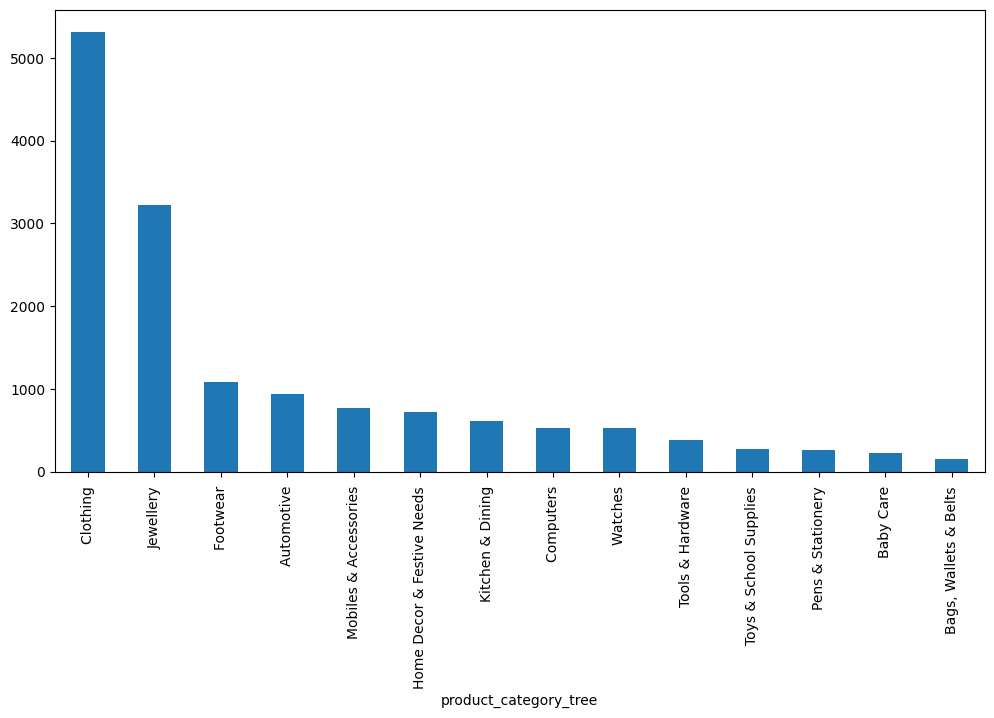

In [104]:
df['product_category_tree'].value_counts().plot(kind = 'bar',
                                                          figsize = (12,6))

### **Word Cloud**

Word clouds are a great way to visualize the frequency of words in text data.

Let us see the frequency of words for Description column.

In [105]:
!pip install wordcloud matplotlib

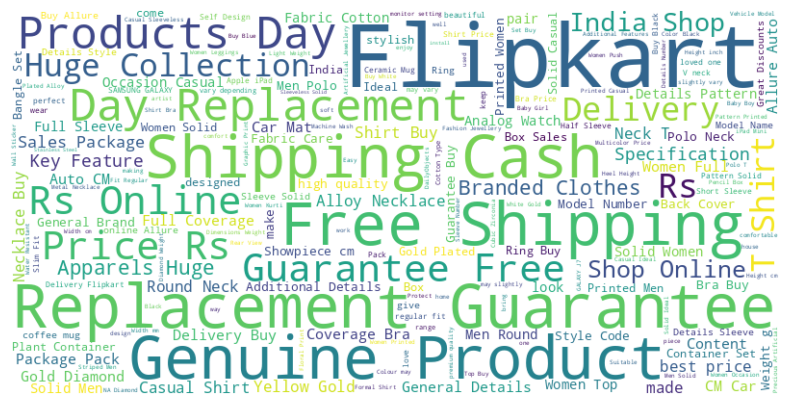

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all descriptions into a single string
text = ' '.join(str(x) for x in df['description'])

# Create a word cloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()

### **Bar Chart**

Creating bar charts to visualize the frequency of specific words or phrases is a great way to gain insights from text data.

Let us generate a bar chart showing the frequency of specific words in Description column

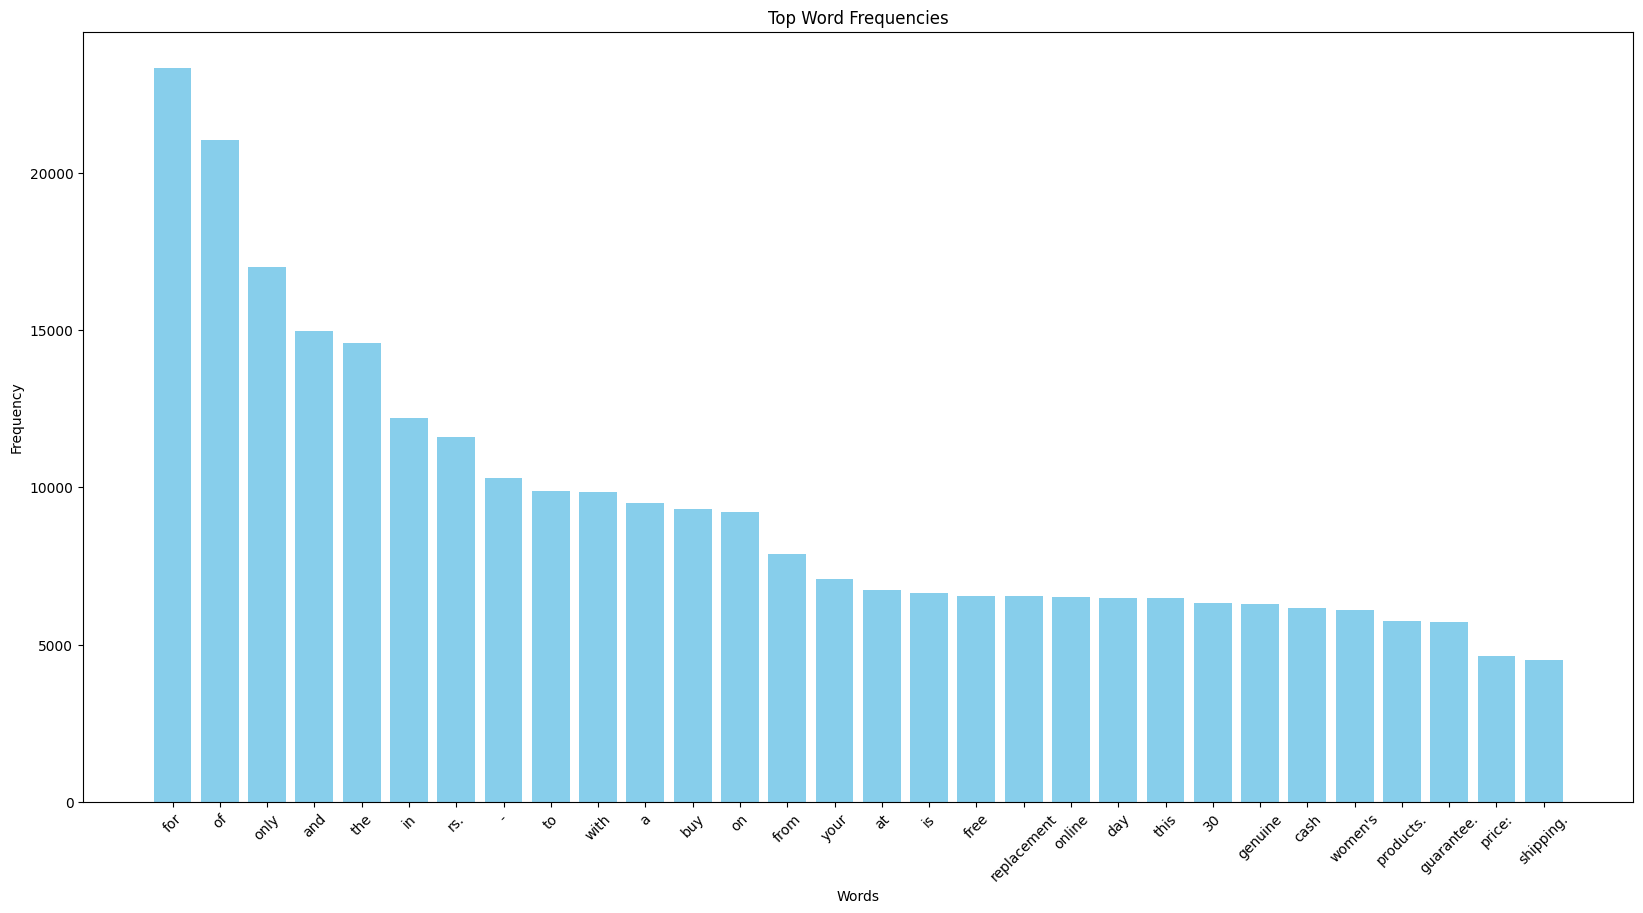

In [107]:
from collections import Counter

# Clean and split the text into words
words = text.lower().split()  # Convert to lowercase and split into words

# Count word frequencies
word_counts = Counter(words)

# Convert to DataFrame for easier plotting
bar_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency
bar_df = bar_df.sort_values(by='Frequency', ascending=False)

# Select the top N words to display
top_n = 30
top_words = bar_df.head(top_n)

# Create a bar chart
plt.figure(figsize=(20, 10))
plt.bar(top_words['Word'], top_words['Frequency'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Word Frequencies')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()

### **Histogram**

Visualizing the distribution of text lengths using histograms is a great way to understand the variability in your text data.

Let us generate a histogram of text lengths.

                                uniq_id            crawl_timestamp  \
0      c2d766ca982eca8304150849735ffef9  2016-03-25 22:59:23 +0000   
1      f449ec65dcbc041b6ae5e6a32717d01b  2016-03-25 22:59:23 +0000   
2      0973b37acd0c664e3de26e97e5571454  2016-03-25 22:59:23 +0000   
3      ce5a6818f7707e2cb61fdcdbba61f5ad  2016-03-25 22:59:23 +0000   
4      29c8d290caa451f97b1c32df64477a2c  2016-03-25 22:59:23 +0000   
...                                 ...                        ...   
14994  abda697c6da997f66c78d91d6c88078c  2015-12-20 08:26:17 +0000   
14995  87bcdd46bb48bfc1045d7ee84aef7b7a  2015-12-20 08:26:17 +0000   
14996  b4fad612a9f72f1ffd10134f9be7cfe8  2015-12-20 08:26:17 +0000   
14997  1336909e5468b63c9b1281350eba647d  2015-12-20 08:26:17 +0000   
14998  d6eff0e0c938cc39c4451083994a2227  2015-12-20 08:26:17 +0000   

                                             product_url  \
0      http://www.flipkart.com/alisha-solid-women-s-c...   
1      http://www.flipkart.com/aw-belli

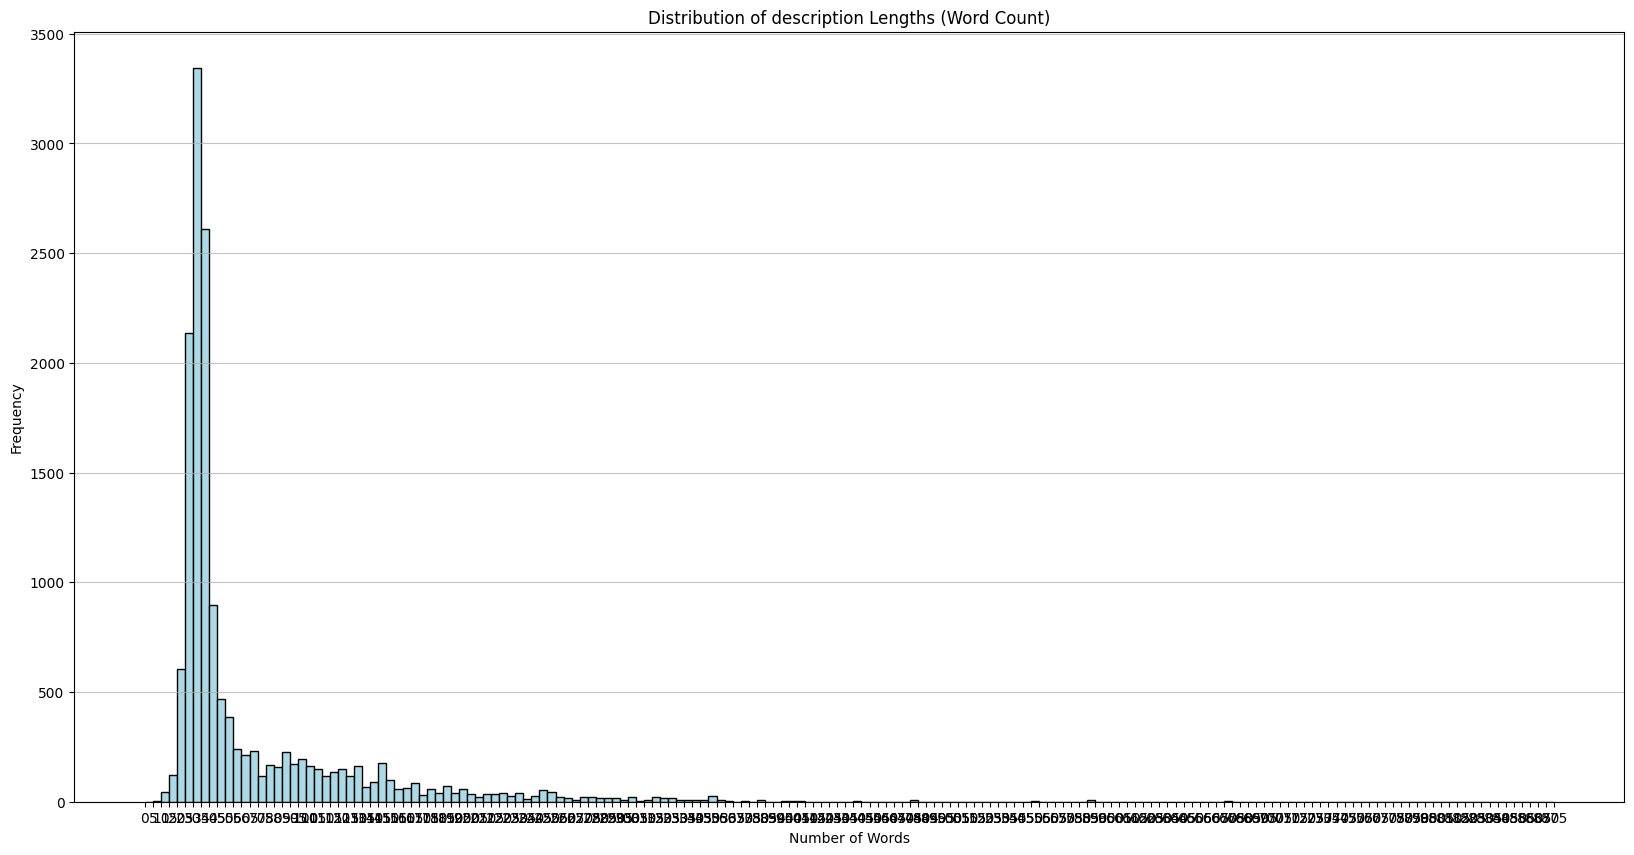

In [108]:
# Histogram

# Calculate the length of each description (word count)
df['word_count'] = df['description'].apply(lambda x: len(str(x).split()) if not isinstance(x, float) else 0)

# Display the DataFrame with word counts
print(df)

# Create a histogram
plt.figure(figsize=(20, 10))
plt.hist(df['word_count'], bins=range(0, max(df['word_count']) + 5, 5), color='lightblue', edgecolor='black')
plt.title('Distribution of description Lengths (Word Count)')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xticks(range(0, max(df['word_count']) + 5, 5))  # Set x-ticks for better readability
plt.grid(axis='y', alpha=0.75)
plt.show()

### **Correlation Matrix**

A correlation matrix is a table showing the correlation coefficients of many variables, most of them in one common data set. Each cell of the matrix expresses the correlation between any pair of variables, which can be valuable in determining relationships between them.

Key Points about Correlation:

A correlation coefficient- is a numerical measure of the strength and direction of a linear relationship between two variables, usually from -1 to +1.

* 1: Perfect positive correlation (as one variable increases, the other one increases).
* 0: Nothing; no correlation (the variables are independent in linearity).
* -1: Perfect negative correlation (as one variable increases, the other decreases).

A heatmap - highly effective way of presenting the correlation matrix and making basic relationships between the variables quickly assessed without going into tedious readings of numerical terms.

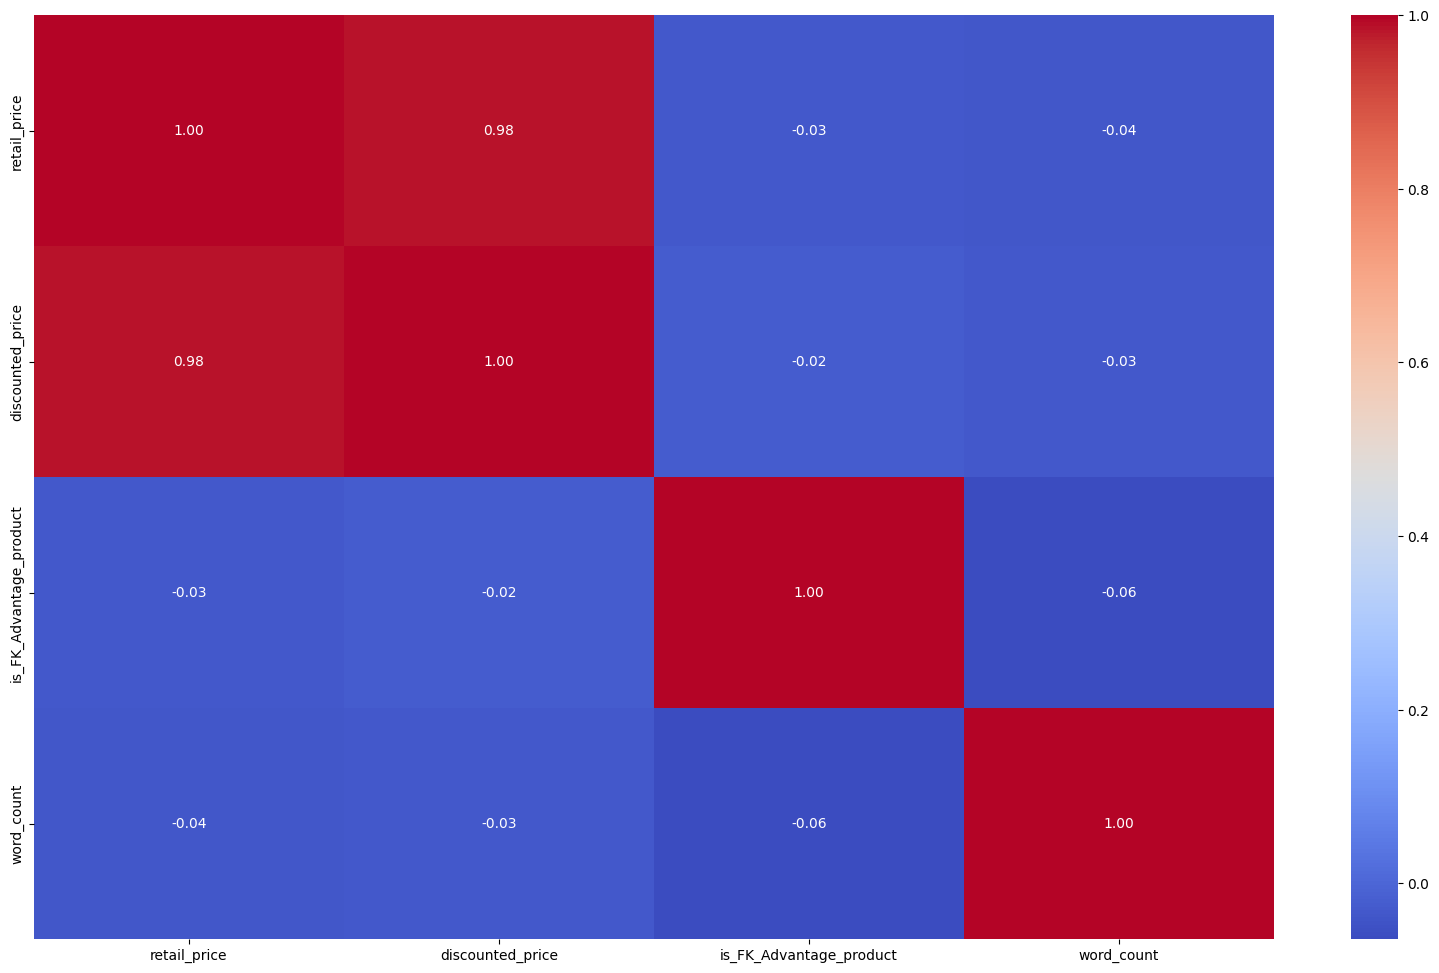

In [109]:
plt.figure(figsize=(20, 12))
corr = df.corr(numeric_only=True)
correlation_heatmap=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            annot=True,
             cmap='coolwarm', fmt=".2f")
plt.show()


# **5. Data cleaning**

* Handling missing values if any

* Removal of outliers

As we know, we have 15 columns in this dataset but not all are necessary for predictions.

Let us drop unnecessary columns.

In [110]:
#list of all the columns in the dataset
print(df.columns.tolist())

['uniq_id', 'crawl_timestamp', 'product_url', 'product_name', 'product_category_tree', 'pid', 'retail_price', 'discounted_price', 'image', 'is_FK_Advantage_product', 'description', 'product_rating', 'overall_rating', 'brand', 'product_specifications', 'word_count']


In [111]:
#dropping the columns which do not add much meaning to our problem statement
df = df.drop(['uniq_id',
               'crawl_timestamp',
               'product_url',
               'pid',
               'retail_price',
               'discounted_price',
               'image',
               'product_rating',
               'overall_rating',
               'is_FK_Advantage_product',
               'product_specifications'], axis = 1)

Display the top 5 rows of the dataframe after dropping columns

In [112]:
df.head()

,product_name,product_category_tree,description,brand,word_count
0,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,64
1,AW Bellies,Footwear,Key Features of AW Bellies Sandals Wedges Heel...,AW,107
2,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,63
3,Alisha Solid Women's Cycling Shorts,Clothing,Key Features of Alisha Solid Women's Cycling S...,Alisha,65
4,"dilli bazaaar Bellies, Corporate Casuals, Casuals",Footwear,"Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,64


### **Check Duplicate values**

In [113]:
count_of_duplicate_rows = df.duplicated().sum()
print(count_of_duplicate_rows)

1771


In [114]:
# drop duplicate values if any
df = df.drop_duplicates()

In [115]:
count_of_duplicate_rows_2 = df.duplicated().sum()
print(count_of_duplicate_rows_2)

0


### **Check Null values**

Let us check for any missing value in the data.

In [116]:
# checking for null values

df_null_count = df.isnull().sum()
df_null_count

,0
product_name,0
product_category_tree,0
description,1
brand,4162
word_count,0


In [117]:
# checking for null value percentage

null_value_percentage = df.isnull().sum()/len(df)
print(null_value_percentage)

product_name             0.000000
product_category_tree    0.000000
description              0.000076
brand                    0.314636
word_count               0.000000
dtype: float64


### **Handling missing values**

Missing values in dataset can lead to disbalanced data and will not show accurate predictions.

Let us check for any missing value in the data and handle them.



In [118]:
import pandas as pd

df['product_category_tree'].dropna(inplace=True)  # Drop NaN values

# Drop the row with missing description
df.dropna(subset=['description'], inplace=True)

# Handle missing brand values
df['brand'].fillna('Unknown', inplace=True)  # If keeping the column

# Verify null values again
print(df.isnull().sum())


product_name             0
product_category_tree    0
description              0
brand                    0
word_count               0
dtype: int64


# **6. Feature Engineering**

### **Text to Feature**

### **a) TF - IDF**

**TF-IDF (Term Frequency-Inverse Document Frequency)** is a numerical statistic that reflects how important a word is to a document in a collection.

In [119]:
# Fill missing values
df['description'].fillna('', inplace=True)
df['product_name'].fillna('', inplace=True)

import re
import numpy as np

def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower().strip()
    return text

df['cleaned_description'] = df['description'].apply(clean_text)


In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer # Importing the necessary class

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_description'])

# Convert to DataFrame for easier handling
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())


In [121]:
# Tokenization
tokenized_descriptions = [desc.split() for desc in df['cleaned_description']]


### **b) Word Embedding**

Word embeddings like **Word2Vec** or GloVe convert words into dense vectors that capture semantic meanings. We can average the vectors for words in a document to create document-level embeddings.

In [122]:
from gensim.models import Word2Vec # Import Word2Vec from gensim.models


# Train Word2Vec model
w2v_model = Word2Vec(sentences=tokenized_descriptions, vector_size=100, window=5, min_count=1, workers=4)

# Get embeddings for each description
def get_embedding(description):
    words = description.split()
    embeddings = [w2v_model.wv[word] for word in words if word in w2v_model.wv]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(w2v_model.vector_size)

# Apply the function to get the embedding for each description
w2v_embeddings = np.array([get_embedding(desc) for desc in df['cleaned_description']])


In [123]:
# Combine TF-IDF and Word2Vec features
combined_features = np.hstack((tfidf_df.values, w2v_embeddings))


In [124]:
combined_df = pd.DataFrame(combined_features)

**One-hot encoding** is a method for converting categorical variables into a format that can be provided to machine learning algorithms to improve predictions. It transforms each category into a new binary column (0s and 1s), indicating the presence or absence of each category in the original data

In [125]:
# One - Hot encoding

y = pd.get_dummies(df['product_category_tree']).values

In [126]:
# Encoding
#label_encoder = LabelEncoder()
#data['encoded_category'] = label_encoder.fit_transform(data['product_category_tree'])
#data = pd.get_dummies(data, columns=['brand'], drop_first=True)


In [127]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y = df['product_category_tree']
encoder.fit(y)
y = encoder.transform(y)

# **7. Split data into train and test sets**

Split the data into training and test sets using the train_test_split function. Specify X as the input features, y as the target variable, set test_size to 0.2 for an 80/20 split, and use random_state for reproducibility.

In [128]:
from sklearn.model_selection import train_test_split

# Split features and target
X = combined_features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (10581, 18520)
X_test shape: (2646, 18520)
y_train shape: (10581,)
y_test shape: (2646,)


In [129]:
# 5. Address Class Imbalance (if needed)
# Example: Checking for class imbalance
#print(y.value_counts())

# **8. Dealing with Imbalanced data**

How SMOTE Works

* Identify Minority Class: SMOTE identifies the instances in the minority class.
* Choose Neighbors: For each instance in the minority class, it selects a number of its nearest neighbors (typically using Euclidean distance).
* Generate Synthetic Samples: New samples are created by interpolating between the instance and its neighbors.

In [130]:
!pip install imbalanced-learn

In [131]:
from imblearn.over_sampling import SMOTE

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print("X_resampled shape:", X_resampled.shape)
print("y_resampled shape:", y_resampled.shape)

X_resampled shape: (53060, 18520)
y_resampled shape: (53060,)


# **9. Scaling**

Scaling is a crucial preprocessing step in machine learning and data analysis.It helps improve model performance, ensures features contribute equally and helps us achieve more reliable and interpretable models.

In [132]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()

X_resampled_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# **10. Train the Model**

We will work with the following 5 models for this project.

1. Random Forest Classifier
2. Extreme Gradient Boosting (XGBoost)
3. Extra Trees Classifier
4. Logistic Regression


Let us work with above models, and visualize the results.

# **Model 1 - Random Forest Classifier**

In [133]:
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=42)
rf_model.fit(X_resampled_scaled, y_resampled)

RandomForestClassifier(max_depth=10, random_state=42)

In [134]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

# Make predictions on the resampled training set
y_train_pred = rf_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = rf_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      3790
           1       0.93      0.94      0.94      3790
           2       0.97      0.99      0.98      3790
           3       0.99      0.93      0.96      3790
           4       0.98      0.96      0.97      3790
           5       0.99      0.99      0.99      3790
           6       0.80      0.99      0.88      3790
           7       1.00      0.97      0.99      3790
           8       0.94      0.93      0.94      3790
           9       0.97      0.98      0.97      3790
          10       1.00      0.70      0.82      3790
          11       1.00      0.95      0.97      3790
          12       0.79      0.96      0.87      3790
          13       1.00      0.99      0.99      3790

    accuracy                           0.95     53060
   macro avg       0.95      0.95      0.95     53060
weighted avg       0.95      0.95      0.95    

In [135]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred, average='weighted')
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred, average='weighted')
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9470599321522805
Training Precision :  0.9537450951880995
Training Recall Score :  0.9470599321522805


In [136]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9259259259259259
Testing Precision :  0.9462374481957738
Testing Recall Score :  0.9259259259259259


### **Cross - Validation Method**

In [137]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(rf_model, X_resampled_scaled, y_resampled, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.93281191 0.94694685 0.9430833  0.94581606 0.94035055]
Mean CV score: 0.9418017338861666


### **Hyperparameter Tuning**

In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up GridSearchCV
param_grid = {
    'n_estimators': [100],
    'max_depth': [None, 10, 20, 30]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                          cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'max_depth': None, 'n_estimators': 100}
Accuracy: 0.05782312925170068
              precision    recall  f1-score   support

           0       1.00      0.03      0.07       176
           1       0.00      0.00      0.00        36
           2       0.01      0.76      0.02        33
           3       1.00      0.05      0.09       934
           4       0.00      0.00      0.00        93
           5       0.00      0.00      0.00       187
           6       0.00      0.00      0.00       145
           7       0.75      0.13      0.22       550
           8       0.00      0.00      0.00       123
           9       0.00      0.00      0.00       108
          10       0.06      0.19      0.09        43
          11       0.00      0.00      0.00        73
          12       0.00      0.00      0.00        43
          13       0.00      0.00      0.00       102

    accuracy                           0

# **Model 2 - Extreme Gradient Boosting**

In [46]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.0/199.0 MB 5.0 MB/s eta 0:00:00


In [47]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_resampled_scaled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

# Make predictions on the resampled training set
y_train_pred = xgb_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = xgb_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3790
           1       1.00      1.00      1.00      3790
           2       1.00      1.00      1.00      3790
           3       1.00      1.00      1.00      3790
           4       1.00      1.00      1.00      3790
           5       1.00      1.00      1.00      3790
           6       1.00      1.00      1.00      3790
           7       1.00      1.00      1.00      3790
           8       1.00      1.00      1.00      3790
           9       1.00      1.00      1.00      3790
          10       0.99      1.00      1.00      3790
          11       1.00      1.00      1.00      3790
          12       1.00      0.99      1.00      3790
          13       1.00      1.00      1.00      3790

    accuracy                           1.00     53060
   macro avg       1.00      1.00      1.00     53060
weighted avg       1.00      1.00      1.00    

In [49]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred, average='weighted')
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred, average='weighted')
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.9996042216358839
Training Precision :  0.9996060068840213
Training Recall Score :  0.9996042216358839


In [50]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.981103552532124
Testing Precision :  0.9816662803172177
Testing Recall Score :  0.981103552532124


### **Cross - Validation Method**

In [51]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_resampled_scaled, y_resampled, cv=3)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.99604229 0.99869961 0.9993215 ]
Mean CV score: 0.9980211326868553


### **Hyperparameter Tuning**

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8, 1.0]
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_xgb_model = grid_search.best_estimator_
y_pred = best_xgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred))

# **Model 3 - Extra Trees Classifier**

In [53]:
from sklearn.ensemble import ExtraTreesClassifier

# Initialize the Extra Trees Classifier
etc_model= ExtraTreesClassifier(n_estimators=100, max_depth=10, min_samples_split=3, random_state=42)
etc_model.fit(X_resampled_scaled, y_resampled)

ExtraTreesClassifier(max_depth=10, min_samples_split=3, random_state=42)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

# Make predictions on the resampled training set
y_train_pred = etc_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = etc_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Multilabel Confusion Matrix:\n", multilabel_confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      3790
           1       0.74      0.88      0.80      3790
           2       0.96      0.96      0.96      3790
           3       0.89      0.81      0.85      3790
           4       0.88      0.93      0.90      3790
           5       1.00      0.90      0.95      3790
           6       0.82      0.98      0.90      3790
           7       0.99      0.95      0.97      3790
           8       0.99      0.88      0.93      3790
           9       0.78      0.95      0.86      3790
          10       1.00      0.56      0.72      3790
          11       0.96      0.93      0.95      3790
          12       0.73      0.89      0.80      3790
          13       0.99      0.96      0.98      3790

    accuracy                           0.90     53060
   macro avg       0.91      0.90      0.90     53060
weighted avg       0.91      0.90      0.90    

In [55]:
# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred, average='weighted')
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred, average='weighted')
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.8958914436486995
Training Precision :  0.9090502516694022
Training Recall Score :  0.8958914436486995


In [56]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.8609221466364324
Testing Precision :  0.9292565357426473
Testing Recall Score :  0.8609221466364324


### **Cross - Validation Method**

In [57]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(etc_model, X_resampled_scaled, y_resampled, cv=5)  # 5-fold cross-validation

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", np.mean(cv_scores))

Cross-validation scores: [0.88183189 0.90576706 0.89747456 0.90341123 0.89068979]
Mean CV score: 0.8958349038823974


### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}


# Set up GridSearchCV
grid_search = GridSearchCV(estimator=etc_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_etc_model = grid_search.best_estimator_
y_pred = best_etc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits


# **Model 4 - Logistic Regression**

In [59]:
from sklearn.linear_model import LogisticRegression

# Train the Random Forest Classifier
lr_model = LogisticRegression(class_weight='balanced')
lr_model.fit(X_resampled_scaled, y_resampled)

LogisticRegression(class_weight='balanced')

In [60]:
# Make predictions on the resampled training set
y_train_pred = lr_model.predict(X_resampled_scaled)

# Make predictions on the test set
y_test_pred = lr_model.predict(X_test_scaled)

# Evaluation metrics for the resampled training set
print("Training Classification Report:\n", classification_report(y_resampled, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_resampled, y_train_pred))

# Evaluation metrics for the test set
print("Testing Classification Report:\n", classification_report(y_test, y_test_pred))
print("Testing Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

Training Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3790
           1       1.00      1.00      1.00      3790
           2       1.00      1.00      1.00      3790
           3       1.00      1.00      1.00      3790
           4       1.00      1.00      1.00      3790
           5       1.00      1.00      1.00      3790
           6       1.00      1.00      1.00      3790
           7       1.00      1.00      1.00      3790
           8       1.00      1.00      1.00      3790
           9       1.00      1.00      1.00      3790
          10       0.99      1.00      1.00      3790
          11       1.00      1.00      1.00      3790
          12       1.00      0.99      1.00      3790
          13       1.00      1.00      1.00      3790

    accuracy                           1.00     53060
   macro avg       1.00      1.00      1.00     53060
weighted avg       1.00      1.00      1.00    

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix

# Predict Training accuracy
train_accuracy = accuracy_score(y_resampled, y_train_pred)
print("Training Accuracy : ", train_accuracy)

# Predict Training precision
train_precision = precision_score(y_resampled, y_train_pred, average='weighted')
print("Training Precision : ", train_precision)

# Predict Training recall score
train_recall = recall_score(y_resampled, y_train_pred, average='weighted')
print("Training Recall Score : ", train_recall)

Training Accuracy :  0.999434602336977
Training Precision :  0.9994369901602175
Training Recall Score :  0.999434602336977


In [62]:
# Predict Testing accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy : ", test_accuracy)

# Predict Testing precision
test_precision = precision_score(y_test, y_test_pred, average='weighted')
print("Testing Precision : ", test_precision)

# Predict Testing recall score
test_recall = recall_score(y_test, y_test_pred, average='weighted')
print("Testing Recall Score : ", test_recall)

Testing Accuracy :  0.9705215419501134
Testing Precision :  0.9706601220311477
Testing Recall Score :  0.9705215419501134


### **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Set up the hyperparameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20)
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=lr_model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='f1')

# Fit GridSearchCV
grid_search.fit(X_resampled_scaled, y_resampled)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Fit the model with the best parameters
best_lr_model = grid_search.best_estimator_
y_pred = best_etc_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Print classification report
print("\nClassification Report for the Best Model:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 20 candidates, totalling 100 fits
